In [1]:
import numpy as np
from math import *
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fit(x):
    if ((x > -0.1) and (x < 0.1)):
        f = -10
    else:
        f = cos(x - 0.5) / abs(x)
    return f
#     return (1.85 - x) * cos(3.5 * x - 0.5)

In [3]:
def bintodec(x):
    d = 0
    for i, x_i in enumerate(x):
        d += 2 ** (len(x) - i - 1) * x_i
    r = a + d * (b - a) / (2 ** len(x) - 1)
    return round(r, 2)

In [4]:
def init(n, l=5):
    return [[random.randint(0, 1) for _ in range(l)] for _ in range(n)]

In [5]:
def reproduction(pop):
    pop_p = [fit(bintodec(ch)) for ch in pop]
    ch_p = [p / sum(pop_p) for p in pop_p]
    res = random.choices(pop, weights=ch_p, k=n)
    return res

In [6]:
def crossingover(pop):
    for i in range(0, n, 2):
        if random.choices([True, False], weights=[p_c, 1 - p_c], k=1)[0]:
            k = random.randint(1, l-1)
            pop[i], pop[i + 1] = pop[i][:k] + pop[i + 1][k:], pop[i + 1][:k] + pop[i][k:]
    return pop

In [7]:
def mutation(pop):
    for cr in pop:
        if random.choices([True, False], weights=[p_m, 1 - p_m], k=1)[0]:
            k = random.randint(1, l) - 1
            cr[k] = 1 if cr[k] == 0 else 0
    return pop

In [8]:
def reduction(pop):
    fit_pop = [fit(bintodec(ch)) for ch in pop]
    fit_sorted = sorted(range(len(pop)), key=fit_pop.__getitem__)
    new_pop = []
    for i in fit_sorted[-n:]:
        new_pop.append(pop[i])
    return new_pop, fit_pop[fit_sorted[-1]]

время поиска, число поколений, точность нахождения решения

число особей в популяции, вероятность кроссинговера, вероятность мутации

In [9]:
a, b = -10, 10
sup = fit(0.10001)

### Зависимость от числа особей в популяции

In [55]:
n_list = [2 ** i for i in range(2, 12)]
l_list = [i for i in range(2, 12)]

# p_c_list = [0.2, 0.5, 0.8]

# p_m_list = [0.001, 0.1, 0.5]

In [56]:
n_iter = 100

acc = [20 / (2 ** l) for l in l_list]

p_c = 0.5
p_m = 0.001

acc

[5.0,
 2.5,
 1.25,
 0.625,
 0.3125,
 0.15625,
 0.078125,
 0.0390625,
 0.01953125,
 0.009765625]

In [57]:
%%time
res_t = []
res_it = []
res_er = []
for n, l in zip(n_list, l_list):
    start = time.time()
    i = 0
    k = 0
    pop = init(n, l)
    while i < n_iter:   
        re_pop = reproduction(pop)
        cr_pop = crossingover(re_pop)
        pop += mutation(cr_pop)
        pop, m = reduction(pop)
        i += 1
#         print(k)
        if abs(bintodec(pop[-1]) - 0.1) < acc[k]:
            break
    k += 1
    res_t.append(time.time() - start)
    res_it.append(i)
    res_er.append(abs(bintodec(pop[-1]) - 0.1))

Wall time: 2.16 s


Text(0.5, 1.0, 'Зависимость времени выполнения от размера популяции')

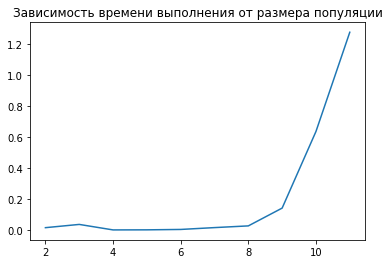

In [58]:
plt.plot(range(2, len(res_t) + 2), res_t)
plt.title('Зависимость времени выполнения от размера популяции')
# plt.savefig("n_t.png")

Text(0.5, 1.0, 'Зависимость количества итераций от размера популяции')

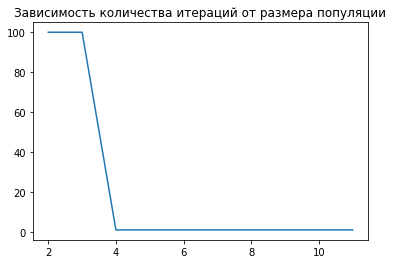

In [59]:
plt.plot(range(2, len(res_it) + 2), res_it)
plt.title('Зависимость количества итераций от размера популяции')
# plt.savefig("n_it.png")

In [60]:
# res_it

Text(0.5, 1.0, 'Зависимость ошибки от размера популяции')

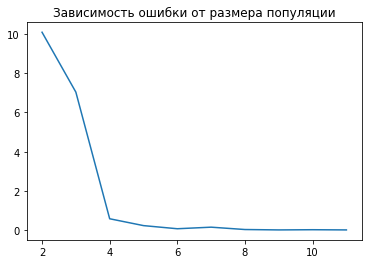

In [61]:
plt.plot(range(2, len(res_er) + 2), res_er)
plt.title('Зависимость ошибки от размера популяции')
# plt.savefig("n_er.png")

In [17]:
# res_er

### Зависимость от вероятности кроссинговера

In [18]:
p_c_list = [0.1 * i for i in range(1, 11)]

In [19]:
n, l = 256, 8

n_iter = 100

acc = 20 / (2 ** l)

p_m = 0.001

In [20]:
acc

0.078125

In [21]:
%%time
res_t = []
res_it = []
res_er = []
for p_c in p_c_list:
    start = time.time()
    i = 0
    pop = init(n, l)
    while i < n_iter:   
        re_pop = reproduction(pop)
        cr_pop = crossingover(re_pop)
        pop += mutation(cr_pop)
        pop, m = reduction(pop)
        i += 1
        if abs(bintodec(pop[-1]) - 0.1) < acc:
            break
    res_t.append(time.time() - start)
    res_it.append(i)
    res_er.append(abs(bintodec(pop[-1]) - 0.1))

Wall time: 2.14 s


Text(0.5, 1.0, 'Зависимость времени выполнения от вероятности кроссинговера')

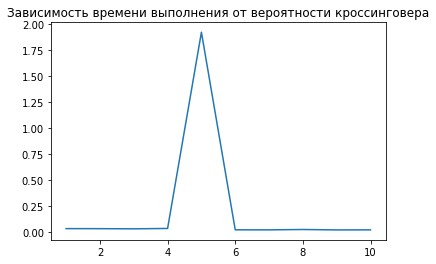

In [22]:
plt.plot(range(1, len(res_t) + 1), res_t)
plt.title('Зависимость времени выполнения от вероятности кроссинговера')
# plt.savefig("p_c_t.png")

Text(0.5, 1.0, 'Зависимость количества итераций от вероятности кроссинговера')

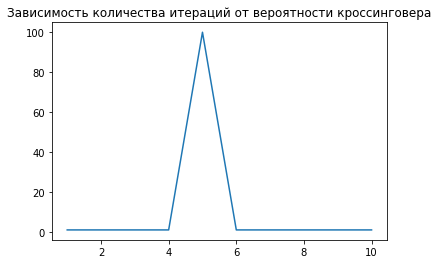

In [23]:
plt.plot(range(1, len(res_it) + 1), res_it)
plt.title('Зависимость количества итераций от вероятности кроссинговера')
# plt.savefig("c_p_it.png")

Text(0.5, 1.0, 'Зависимость ошибки от вероятности кроссинговера')

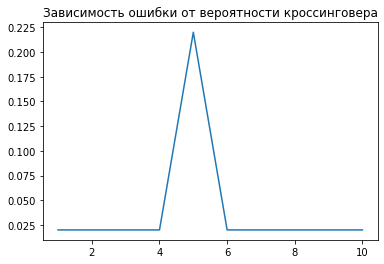

In [24]:
plt.plot(range(1, len(res_er) + 1), res_er)
plt.title('Зависимость ошибки от вероятности кроссинговера')
# plt.savefig("c_p_er.png")

In [25]:
# res_er

In [26]:
# bintodec(pop[-1])

### Зависимость от вероятности мутации

In [27]:
p_m_list = [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1]

In [28]:
n, l = 256, 8

n_iter = 100

acc = 20 / (2 ** l)

p_c = 1

In [29]:
acc

0.078125

In [30]:
%%time
res_t = []
res_it = []
res_er = []
init_pop = []
end_pop = []
for p_m in p_m_list:
    start = time.time()
    i = 0
    pop = init(n, l)
    init_pop.append(pop)
    while i < n_iter:   
        re_pop = reproduction(pop)
        cr_pop = crossingover(re_pop)
        pop += mutation(cr_pop)
        pop, m = reduction(pop)
        i += 1
#         print(abs(m - sup), abs(fit(0.1 + acc) - sup))
        if abs(bintodec(pop[-1]) - 0.1) < acc:
            break
    end_pop.append(pop)
    res_t.append(time.time() - start)
    res_it.append(i)
    res_er.append(abs(bintodec(pop[-1]) - 0.1))

Wall time: 183 ms


Text(0.5, 1.0, 'Зависимость времени выполнения от вероятности мутации')

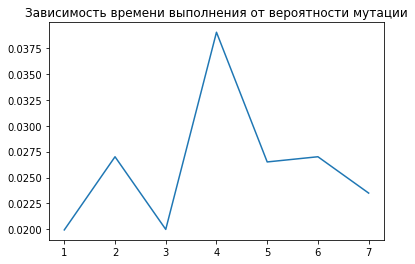

In [31]:
plt.plot(range(1, len(res_t) + 1), res_t)
plt.title('Зависимость времени выполнения от вероятности мутации')
# plt.savefig("c_m_t.png")

Text(0.5, 1.0, 'Зависимость количества итераций от вероятности мутации')

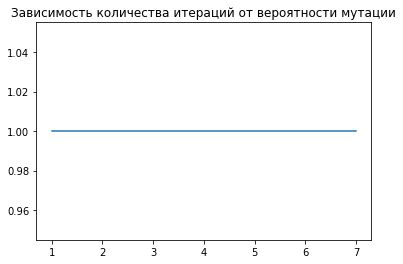

In [32]:
plt.plot(range(1, len(res_it) + 1), res_it)
plt.title('Зависимость количества итераций от вероятности мутации')
# plt.savefig("c_m_it.png")

Text(0.5, 1.0, 'Зависимость ошибки от вероятности мутации')

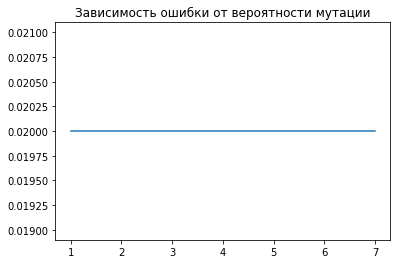

In [33]:
plt.plot(range(1, len(res_er) + 1), res_er)
plt.title('Зависимость ошибки от вероятности мутации')
# plt.savefig("c_m_er.png")

In [34]:
# res_er

In [35]:
# bintodec(pop[-1])

In [68]:
n, l = 256, 8
n_iter = 100
p_c = 0.5
p_m = 0.001
acc = 20 / (2 ** l)
acc

0.078125

In [66]:
pop = init(n, l)
pops = [pop]
for i in range(1, n_iter + 1):
    k = 1
    re_pop = reproduction(pop)
    cr_pop = crossingover(re_pop)
    pop += mutation(cr_pop)
    pop, m = reduction(pop)
    pops.append(pop)
#     if abs(bintodec(pop[-1]) - 0.1) < acc:
#         print(i)
#         break
    for j in range(1, len(pop)):
        if pop[j] == pop[j - 1]:
            k += 1
    if k == len(pop):
        print(i)
        break
        

10


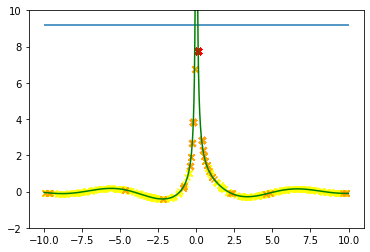

In [67]:
plt.ylim(-2, 10)
x = np.arange(-10, 10, 0.01)
x = sorted(x)
y = [fitness(x_i) for x_i in x]
plt.plot(x, y, color='green')
plt.hlines(fitness(0.1), -10, 10)
dots_x = [bintodec(ch) for ch in pops[0]]
dots_y = [fit(dot) for dot in dots_x]
plt.scatter(dots_x, dots_y, marker='x', color='yellow')
# dots_x = [bintodec(ch) for ch in pops[1]]
# dots_y = [fit(dot) for dot in dots_x]
# plt.scatter(dots_x, dots_y, marker='x', color='orange')
dots_x = [bintodec(ch) for ch in pops[2]]
dots_y = [fit(dot) for dot in dots_x]
plt.scatter(dots_x, dots_y, marker='x', color='orange')
# dots_x = [bintodec(ch) for ch in pops[3]]
# dots_y = [fit(dot) for dot in dots_x]
# plt.scatter(dots_x, dots_y, marker='x', color='orange')
dots_x = [bintodec(ch) for ch in pops[-1]]
dots_y = [fit(dot) for dot in dots_x]
plt.scatter(dots_x, dots_y, marker='x', c='red')
# plt.savefig('pop_pretty.png')

In [39]:
def fitness(x):
    return cos(x - 0.5) / abs(x)
#     return (1.85 - x) * cos(3.5 * x - 0.5)

In [116]:
acc = 1.25
n = log2(1 / acc * (b - a)) // 1 + 1
int(n)

5

In [118]:
n = 4
acc = (b - a) / (2 ** n)
acc

1.25